In [1]:
#para aceitar acentos:

# encoding: utf-8


from netCDF4 import Dataset

import netCDF4 as nc

import numpy as np

import matplotlib as mp

import matplotlib.pyplot as plt

import cartopy

In [3]:
# Importando um arquivo de um diretorio do computador

dt_45_2055 = nc.Dataset(r'C:\Doutorado\2_Trimestre\Disciplinas\Climatologia\Anomalia_simples\Full_Year\2006_to_2055\RCP4.5_Primary_Productivity_Average_of_all_models_Anomaly_Entire_Year_2055_Global.nc', mode = 'r'  )
dt_85_2055 = nc.Dataset(r'C:\Doutorado\2_Trimestre\Disciplinas\Climatologia\Anomalia_simples\Full_Year\2006_to_2055\RCP8.5_Primary_Productivity_Average_of_all_models_Anomaly_Entire_Year_2055_Global.nc', mode = 'r')
dt_45_2099 = nc.Dataset(r'C:\Doutorado\2_Trimestre\Disciplinas\Climatologia\Anomalia_simples\Full_Year\2006_to_2099\RCP4.5_Primary_Productivity_Average_of_all_models_Anomaly_Entire_Year_2099_Global.nc', mode = 'r')
dt_85_2099 = nc.Dataset(r'C:\Doutorado\2_Trimestre\Disciplinas\Climatologia\Anomalia_simples\Full_Year\2006_to_2099\RCP8.5_Primary_Productivity_Average_of_all_models_Anomaly_Entire_Year_2099_Global.nc', mode = 'r')






In [4]:
#listagem das funções Netcdf

dir(nc)

['CompoundType',
 'Dataset',
 'Dimension',
 'EnumType',
 'Group',
 'MFDataset',
 'MFTime',
 'MINYEAR',
 'NC_DISKLESS',
 'OrderedDict',
 'VLType',
 'Variable',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__has_cdf5_format__',
 '__has_nc_inq_format_extended__',
 '__has_nc_inq_path__',
 '__has_nc_open_mem__',
 '__has_nc_par__',
 '__has_rename_grp__',
 '__hdf5libversion__',
 '__loader__',
 '__name__',
 '__netcdf4libversion__',
 '__package__',
 '__path__',
 '__pdoc__',
 '__spec__',
 '__version__',
 '_netCDF4',
 'buffer',
 'chartostring',
 'date2index',
 'date2num',
 'datetime',
 'day_units',
 'default_encoding',
 'default_fillvals',
 'getlibversion',
 'glob',
 'gregorian',
 'hr_units',
 'is_native_big',
 'is_native_little',
 'ma',
 'microsec_units',
 'millisec_units',
 'min_units',
 'netcdftime',
 'num2date',
 'numpy',
 'posixpath',
 'python3',
 'sec_units',
 'stringtoarr',
 'stringtochar',
 'sys',
 'timedelta',
 'unicode_error',
 'utils',
 'warnings',
 'weakref']

In [5]:
#Leitura/Query das dimensões do objeto netcdf
print ("\nDimensoes do Dicionario: {0}\n".format(len(dt_45_2055.dimensions)))

for i in dt_45_2055.dimensions:
    print (dt_45_2055.dimensions[i])
    print("")


Dimensoes do Dicionario: 2

<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 178


<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 360




In [6]:
print("\nNumero de Atributos do Arquivo {0}: {1}\n\n\n".format("dt_45_2055", len(dt_45_2055.ncattrs())))

for key in dt_45_2055.ncattrs():

    print ("global attribute["+key+"]=" + str(getattr(dt_45_2055, key)))



Numero de Atributos do Arquivo dt_45_2055: 7



global attribute[model]=ENSMN
global attribute[experiment]=rcp45
global attribute[variable]=intpp
global attribute[futuretime]=2006-2055
global attribute[historictime]=1956-2005
global attribute[history]=This data file was produced at NOAA/ESRL/PSD with the support of the US Bureau of Reclamation, US Army Corps of Engineers, and CIRES with the esrl.noaa.gov/psd/ipcc/ocn website.
global attribute[acknowledgement]=We acknowledge the World Climate Research Programme's Working Group on Coupled Modelling, which is responsible for CMIP, and we thank the climate modeling groups listed below for producing and making available their model output. For CMIP the U.S. Department of Energy's Program for Climate Model Diagnosis and Intercomparison provides coordinating support and led development of software infrastructure in partnership with the Global Organization for Earth System Science Portals. More information on the Coupled Model Intercomparison

In [8]:
# Como saber as dimensões de cada variável de um objeto:

vars = dt_45_2055.variables # é um dicionário ordenado
dims = dt_45_2055.dimensions #dims é um dicionário ordenado

print ("Tipo de Objeto dims: {0}.\n".format(type(dims)))

for Uma_variavel in vars:
    print ("")
    print ('--------------- variable: ['+Uma_variavel+']---------------')
    
    print("shape = "+str(vars[Uma_variavel].shape)) #as dimensões das variáveis;
    
    vdims = vars[Uma_variavel].dimensions
    print (vdims)
    print(type(vdims))
    print(len(vdims))
    print("*******")
    
# vdims é uma tupla contendo as dimensoes de cada vars 
           
    for vd in vdims:
        print("dimension["+vd+"]="+str(len(dims[vd])))   
# vai printar o comprimento

Tipo de Objeto dims: <class 'collections.OrderedDict'>.


--------------- variable: [histclim]---------------
shape = (178, 360)
('lat', 'lon')
<class 'tuple'>
2
*******
dimension[lat]=178
dimension[lon]=360

--------------- variable: [lat]---------------
shape = (178,)
('lat',)
<class 'tuple'>
1
*******
dimension[lat]=178

--------------- variable: [lon]---------------
shape = (360,)
('lon',)
<class 'tuple'>
1
*******
dimension[lon]=360

--------------- variable: [anomaly]---------------
shape = (178, 360)
('lat', 'lon')
<class 'tuple'>
2
*******
dimension[lat]=178
dimension[lon]=360

--------------- variable: [histstddev]---------------
shape = (178, 360)
('lat', 'lon')
<class 'tuple'>
2
*******
dimension[lat]=178
dimension[lon]=360

--------------- variable: [varratio]---------------
shape = (178, 360)
('lat', 'lon')
<class 'tuple'>
2
*******
dimension[lat]=178
dimension[lon]=360


# Operando os dados do arquivo:

In [9]:
#extração de uma variável de um objeto ncfile e convertendo a um array

lat = dt_45_2055.variables['lat'][:]
long = dt_45_2055.variables['lon'][:]

In [10]:
dt_45_2055

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    model: ENSMN
    experiment: rcp45
    variable: intpp
    futuretime: 2006-2055
    historictime: 1956-2005
    history: This data file was produced at NOAA/ESRL/PSD with the support of the US Bureau of Reclamation, US Army Corps of Engineers, and CIRES with the esrl.noaa.gov/psd/ipcc/ocn website.
    acknowledgement: We acknowledge the World Climate Research Programme's Working Group on Coupled Modelling, which is responsible for CMIP, and we thank the climate modeling groups listed below for producing and making available their model output. For CMIP the U.S. Department of Energy's Program for Climate Model Diagnosis and Intercomparison provides coordinating support and led development of software infrastructure in partnership with the Global Organization for Earth System Science Portals. More information on the Coupled Model Intercomparison Project (CMIP5) and the 5th Assessment of 

In [11]:
#Atribuindo variáveis do netcdf a arrays numpy:

varlist = ['histclim', 'anomaly', 'histstddev', 'varratio']
                           
#Definindo variáveis

arr45_2055 =[]
arr85_2055=[]
arr45_2099=[]
arr85_2099=[]



for x in varlist:
    arr45_2055.append(dt_45_2055.variables[x])
    arr85_2055.append(dt_85_2055.variables[x])
    arr45_2099.append(dt_45_2099.variables[x])
    arr85_2099.append(dt_85_2099.variables[x])

    
    
#Verificando as dimensões da array:

print (np.shape(arr45_2055))

#Convertendo tudo em array:

arr45_2055 = np.asarray(arr45_2055)
arr85_2055 = np.asarray(arr85_2055)
arr45_2099 = np.asarray(arr45_2099)
arr85_2099 = np.asarray(arr85_2099)


(4, 178, 360)


In [22]:
#Invertendo o eixo da longitude:

arr45_2055 = arr45_2055[:,::-1]
arr85_2055 = arr85_2055[:,::-1]
arr45_2099 = arr45_2099[:,::-1]
arr85_2099 = arr85_2099[:,::-1]



arr45_2055 = np.where(arr45_2055>1e10,np.nan,arr45_2055)
arr85_2055 = np.where(arr85_2055>1e10,np.nan,arr85_2055)
arr45_2099 = np.where(arr45_2099>1e10,np.nan,arr45_2099)
arr85_2099 = np.where(arr85_2099>1e10,np.nan,arr85_2099) 

In [23]:
np.shape(arr85_2055)

(4, 178, 360)

In [24]:
#Extração de nulos e continentes:

arr45_2055 = np.where(arr45_2055>1e9,np.nan,arr45_2055)
arr85_2055 = np.where(arr85_2055>1e9,np.nan,arr85_2055)
arr45_2099 = np.where(arr45_2099>1e9,np.nan,arr45_2099)
arr85_2099 = np.where(arr85_2099>1e9,np.nan,arr85_2099) 

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in greater
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in greater
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in greater


In [25]:
#Atribuição de variáveis:

lons = dt_45_2055.variables['lon'][:]
lats = dt_45_2055.variables['lat'][:]
Anomaly_45_2055 = dt_45_2055.variables['anomaly'][:]
Anomaly_85_2055 = dt_85_2055.variables['anomaly'][:]
Anomaly_45_2099 = dt_45_2099.variables['anomaly'][:]
Anomaly_85_2099 = dt_85_2099.variables['anomaly'][:]

Anomaly_units = dt_45_2055.variables['anomaly'].units

print ("Unidade da variavel anomalia: {0}".format(Anomaly_units))

Mean_45_2055 = dt_45_2055.variables['histclim'][:]




Unidade da variavel anomalia: 1.E-9 mol m-2 s-1


In [26]:
#Atribuindo variáveis do netcdf a arrays numpy:

varlist = ['histclim', 'anomaly', 'histstddev', 'varratio']
                           
#Definindo PPF:

PPF_45_2055 = arr45_2055[0] + arr45_2055[1]
PPF_85_2055 = arr85_2055[0] + arr85_2055[1]
PPF_45_2099 = arr45_2099[0] + arr45_2099[1]
PPF_85_2099 = arr85_2099[0] + arr85_2099[1]




In [27]:
lats.shape

PPF_45_2055.shape[0]

178

In [29]:
#Corrigindo PPF em função da latitude:
import math
lats.shape

lats = np.asanyarray(lats)

for i in range(lats.shape[0]):
     PPF_45_2055[i] = PPF_45_2055[i] * math.cos(lats[i])
     PPF_85_2055[i] = PPF_85_2055[i] * math.cos(lats[i])
     PPF_45_2099[i] = PPF_45_2099[i] * math.cos(lats[i])
     PPF_85_2099[i] = PPF_85_2099[i] * math.cos(lats[i])
    

C:\ProgramData\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\ProgramData\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


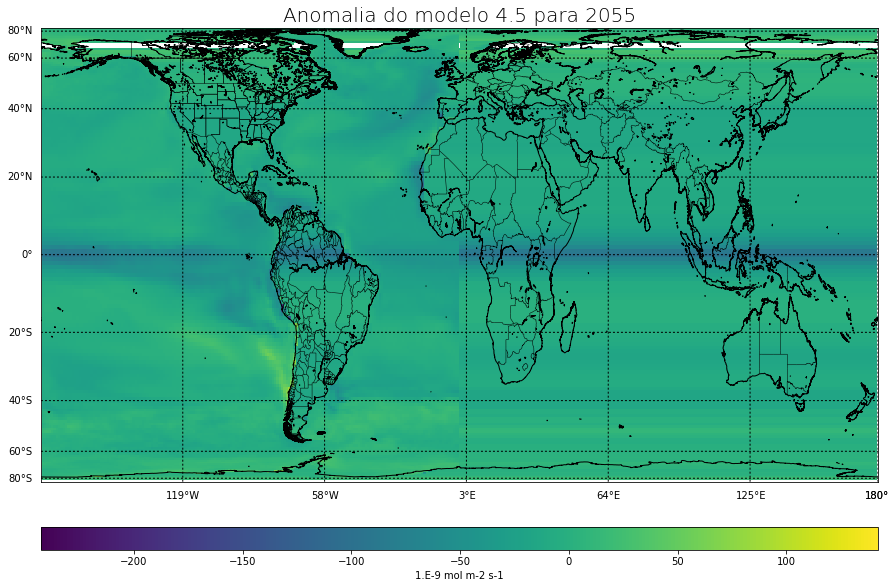

In [30]:
# Definindo tamanho da imagem de saida:

plt.figure(figsize=(15,15))

# Definindo mapa base com projeção, cor, Gridlines, colorbars, and axis labels e etc.

 # Há varias formas de plotar o gráfico (pcolor, pcolormesh, contour, contourf, scatter, etc.). 
    # Neste caso, usou-se o pcolor.

lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap (resolution='i',projection='cea',\
            lat_ts=40)

#When we give this Basemap instance our coordinate variables, it returns our plotting coordinates. 
    # This is how basemap knows where to put our projected data on the map

lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Plot Data
cs_45_2055 = m.pcolor(xi,yi,np.squeeze(Anomaly_45_2055))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 20.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 180., 61.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs_45_2055, location='bottom', size='5%', pad="10%")
cbar.set_label(Anomaly_units)

# Add Title
plt.title('Anomalia do modelo 4.5 para 2055', fontsize=20, fontweight=12, verticalalignment= 'baseline')

# imprimindo imagem:

plt.show()

# Plotando mais de uma figura por Plot

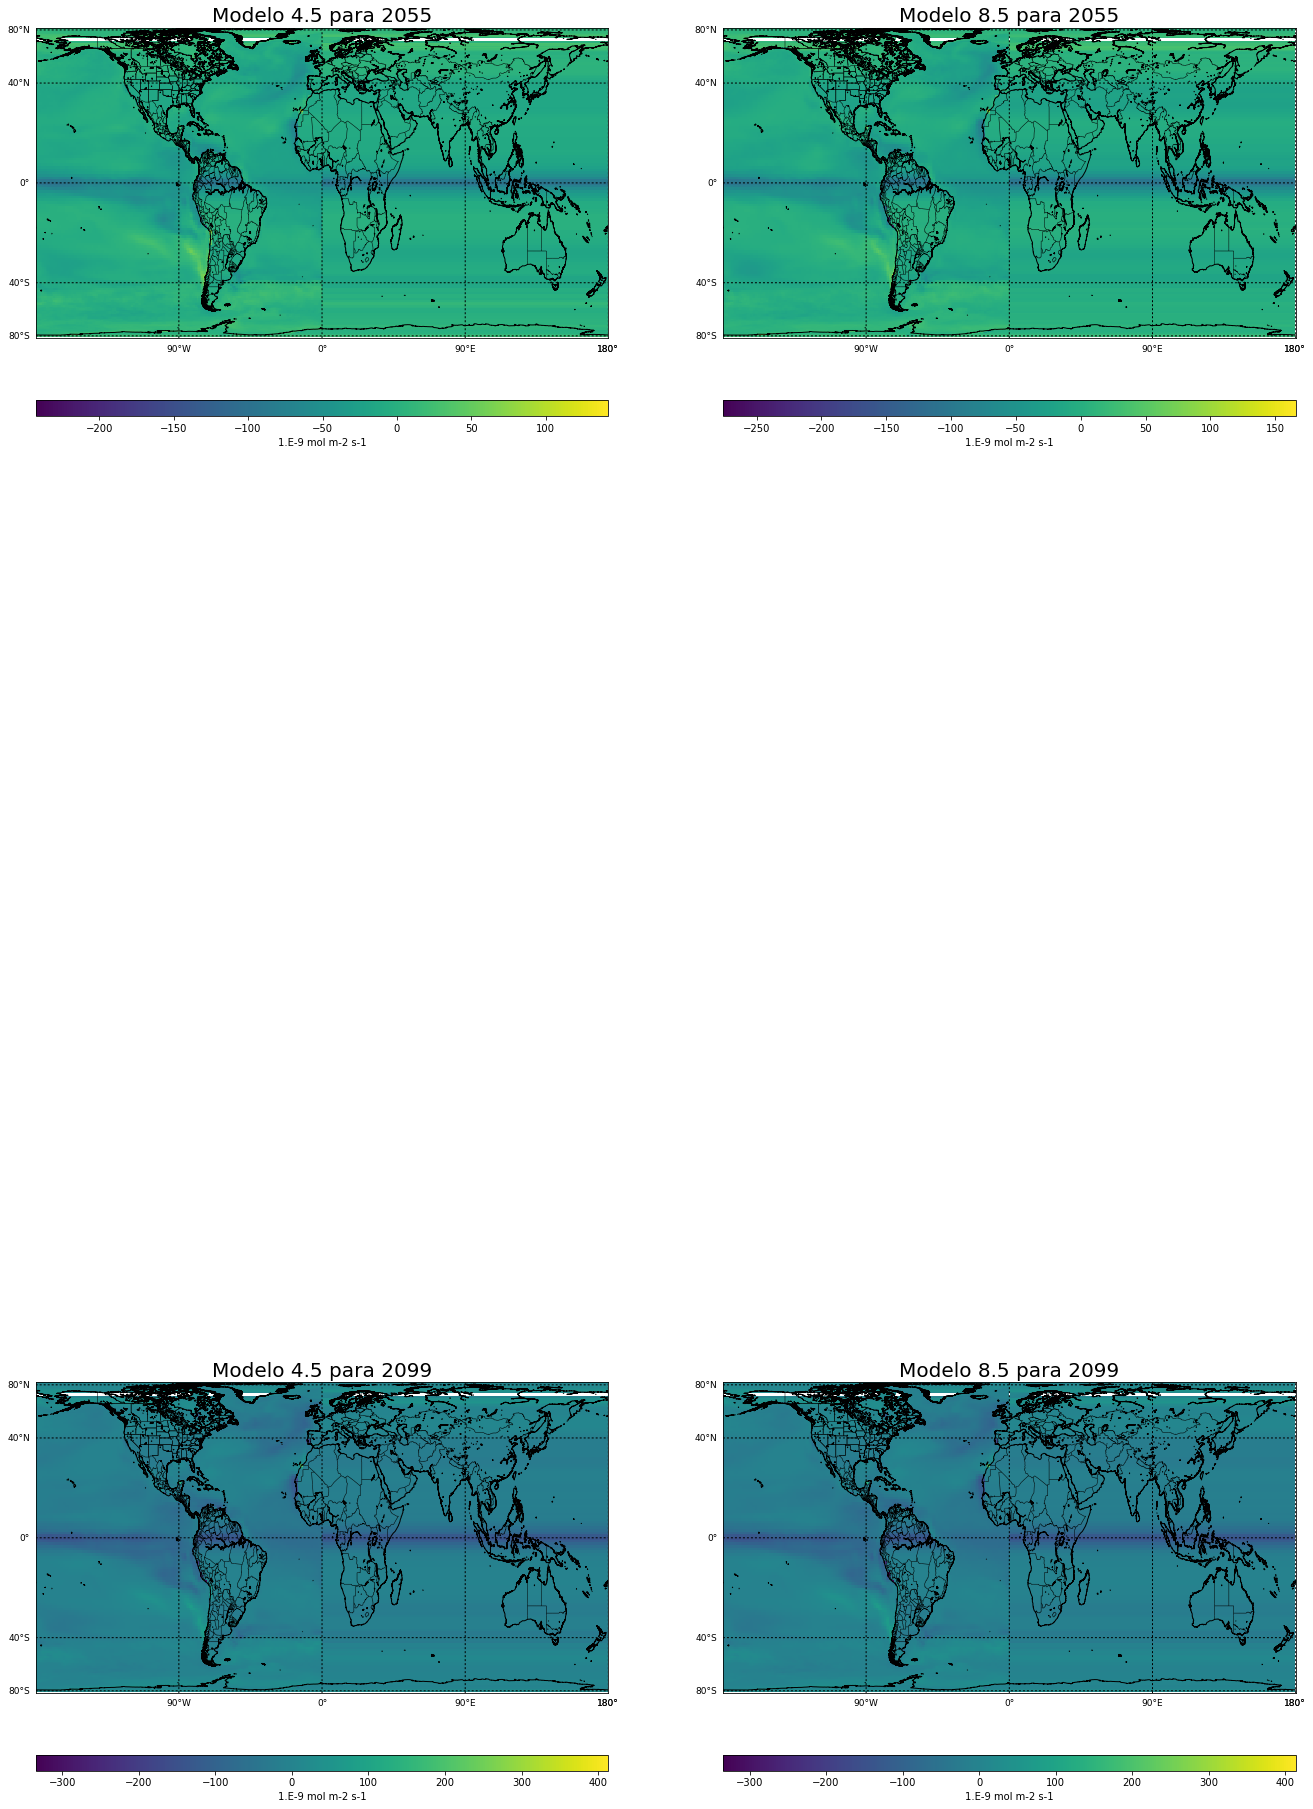

In [34]:
plt.figure(1, figsize=(20,20))

plt.subplots_adjust(top = 1.85, right = 1.0)
########################## -------------------Figura 1 -----------------------------------------

plt.subplot(221)
plt.title("Modelo 4.5 para 2055", fontsize = 20)
#plt.imshow(Anomaly_45_2055, cmap = 'Spectral_r')

# Plot Data
cs_45_2055 = m.pcolor(xi,yi,np.squeeze(Anomaly_45_2055))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 40.), labels=[1,0,0,0], fontsize=9)
m.drawmeridians(np.arange(-180., 180., 90.), labels=[0,0,0,1], fontsize=9)


# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

  
# Add Colorbar
cbar = m.colorbar(cs_45_2055, location='bottom', pad="20%")

cbar.set_label(Anomaly_units)

########################## -------------------Figura 2 -----------------------------------------


plt.subplot(222)
plt.title("Modelo 8.5 para 2055", fontsize = 20)
plt.imshow(Anomaly_85_2055, cmap = 'Spectral_r')

# Plot Data
cs_85_2055 = m.pcolor(xi,yi,np.squeeze(Anomaly_85_2055))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 40.), labels=[1,0,0,0], fontsize=9)
m.drawmeridians(np.arange(-180., 180., 90.), labels=[0,0,0,1], fontsize=9)


# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs_85_2055, location='bottom', pad="20%")
cbar.set_label(Anomaly_units)
           
           
########################## -------------------Figura 3 -----------------------------------------      

           
plt.subplot(223)
plt.title("Modelo 4.5 para 2099", fontsize = 20)
plt.imshow(Anomaly_45_2099, cmap = 'Spectral_r')

# Plot Data
cs_45_2099 = m.pcolor(xi,yi,np.squeeze(Anomaly_45_2099))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 40.), labels=[1,0,0,0], fontsize=9)
m.drawmeridians(np.arange(-180., 180., 90.), labels=[0,0,0,1], fontsize=9)


# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs_45_2099, location='bottom', pad="20%")
cbar.set_label(Anomaly_units)
           
           
########################## -------------------Figura 4 -----------------------------------------     

           
plt.subplot(224) 
plt.title("Modelo 8.5 para 2099", fontsize = 20)
plt.imshow(Anomaly_45_2099, cmap = 'Spectral_r')

cs_85_2099 = m.pcolor(xi,yi,np.squeeze(Anomaly_85_2099))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 40.), labels=[1,0,0,0], fontsize=9)
m.drawmeridians(np.arange(-180., 180., 90.), labels=[0,0,0,1], fontsize=9)


# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs_85_2099, location='bottom', pad="20%")
cbar.set_label(Anomaly_units)
           
plt.show()

# Rasterize: Estatística Zonal:

### https://mapbox.github.io/rasterio/topics/features.html